In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
df=pd.read_csv("df_clean2.csv")
df.head()

,Unnamed: 0,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location
0,0,1208575,03/11/2013,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)"
1,4,42104479,01/04/2014,2300,21,Topanga,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,"(34.2009, -118.6369)"
2,5,120125367,01/08/2013,1400,1,Central,110,CRIMINAL HOMICIDE,49.0,F,W,"(34.0591, -118.2412)"
3,9,120908292,01/15/2013,800,9,Van Nuys,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,O,"(34.2012, -118.4662)"
4,12,121207315,02/13/2013,1200,12,77th Street,440,THEFT PLAIN - PETTY ($950 & UNDER),42.0,M,H,"(33.9651, -118.2783)"


## Converting the type of 'Time Occurred' to 'Date Time'

In [4]:
df["DateOccurred"]=pd.to_datetime(df["DateOccurred"])
type(df["DateOccurred"][0])

pandas._libs.tslibs.timestamps.Timestamp

## Plotting some line graphs showing crime rate vs year

Text(0.5,1,'crime rate vs year of individual areas')

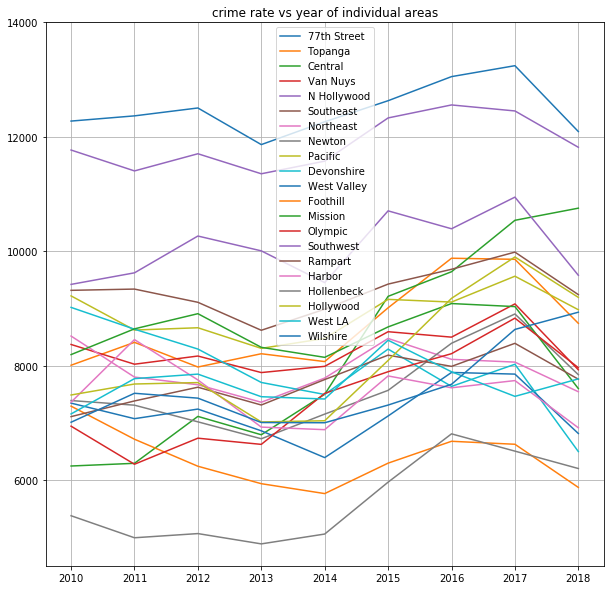

In [5]:
#import seaborn as sns

plt.figure(figsize=(10,10))
AreaName=df["AreaName"].unique().tolist()
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.ylim(4500,14000)
plt.title("crime rate vs year of individual areas")

Text(0.5,1,'crime rate vs year for 3 top safest and 3 least safe areas ')

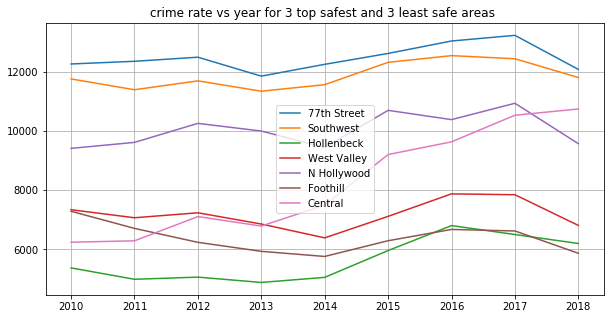

In [6]:
#import seaborn as sns

plt.figure(figsize=(10,5))
#AreaName=df["AreaName"].unique().tolist()
AreaName=['77th Street',  
        'Southwest', 'Hollenbeck',
         'West Valley',
       'N Hollywood', 'Foothill',"Central"
       ]
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.title("crime rate vs year for 3 top safest and 3 least safe areas ")

In [8]:
df.columns

Index(['Unnamed: 0', 'DRNumber', 'DateOccurred', 'TimeOccurred', 'AreaID',
       'AreaName', 'CrimeCode', 'CrimeCodeDescription', 'VictimAge',
       'VictimSex', 'VictimDescent', 'Location', 'YearOccurred'],
      dtype='object')

## Bar charts : comparing the crime rate of LA areas; which are the safest and the most dangerous neighborhoods in LA?

In [7]:
barchart=df.groupby("AreaName").count()
barchart=barchart.sort_values(by="NewCrimeCategory",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate from 2010 to 2017")
plt.ylim(0,115000)

KeyError: 'NewCrimeCategory'

## How much has the crime rate of LA areas changed over the past 8 years?

/Users/John/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(0, 13500)

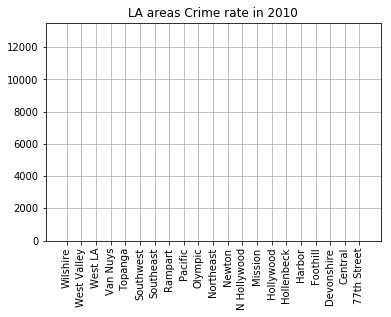

In [9]:
barchart=df.loc[df["YearOccurred"]==2010,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2010")
plt.ylim(0,13500)

In [ ]:
barchart=df.loc[df["YearOccurred"]==2015,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2015")
plt.ylim(0,13500)

In [ ]:
barchart=df.loc[df["YearOccurred"]==2017,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2017")
plt.ylim(0,13500)

## Let's practice some BOXPLOTS : Crime Rate Variation of LA Areas?

In [10]:
Boxplot=pd.DataFrame(df.groupby(["AreaName","YearOccurred"])["AreaID"].value_counts())

Boxplot=Boxplot.rename({"AreaID":"TotalCrime"},axis=1)
Boxplot.reset_index().head()

,AreaName,YearOccurred,AreaID,TotalCrime
0,77th Street,2010,12,12272
1,77th Street,2011,12,12363
2,77th Street,2012,12,12501
3,77th Street,2013,12,11861
4,77th Street,2014,12,12260


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]), <a list of 21 Text xticklabel objects>)

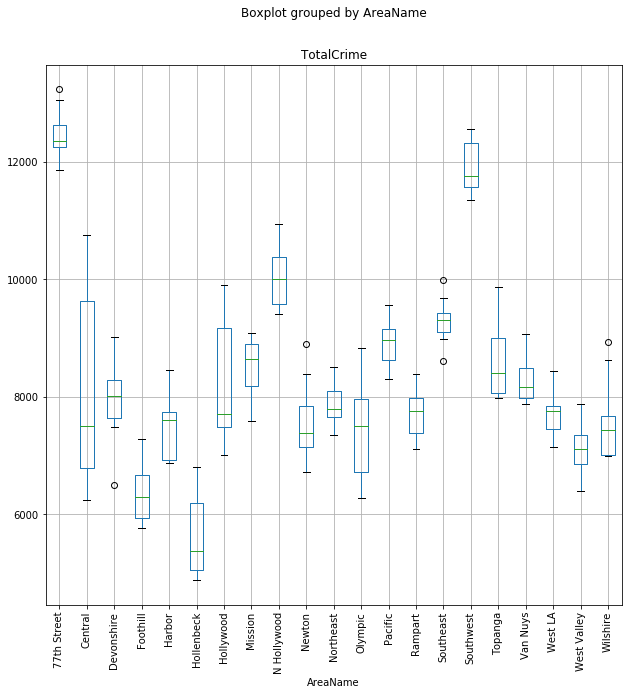

In [11]:
import scipy.stats as stats
Boxplot.boxplot("TotalCrime", by="AreaName", figsize=(10, 10))
plt.xticks(rotation="vertical")

## 3.	Which categories have the highest rates of crime? Does it change by neighborhood?

In [12]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Central["NewCrimeCategory"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Southwest["NewCrimeCategory"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","NewCrimeCategory"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["NewCrimeCategory"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 street")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","NewCrimeCategory"].value_counts()).reset_index()

plt.pie(Hollenbeck["NewCrimeCategory"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollnbeck")

KeyError: 'the label [NewCrimeCategory] is not in the [columns]'

## 5.	Are there different trends between violent and non-violent crimes?

In [13]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Central["Violent_NonViolent"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Southwest["Violent_NonViolent"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","Violent_NonViolent"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["Violent_NonViolent"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 sctreet")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","Violent_NonViolent"].value_counts()).reset_index()

plt.pie(Hollenbeck["Violent_NonViolent"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollenbeck")

KeyError: 'the label [Violent_NonViolent] is not in the [columns]'

In [14]:
df.head()

,Unnamed: 0,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,YearOccurred
0,0,1208575,2013-03-11,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",2013
1,4,42104479,2014-01-04,2300,21,Topanga,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,"(34.2009, -118.6369)",2014
2,5,120125367,2013-01-08,1400,1,Central,110,CRIMINAL HOMICIDE,49.0,F,W,"(34.0591, -118.2412)",2013
3,9,120908292,2013-01-15,800,9,Van Nuys,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,O,"(34.2012, -118.4662)",2013
4,12,121207315,2013-02-13,1200,12,77th Street,440,THEFT PLAIN - PETTY ($950 & UNDER),42.0,M,H,"(33.9651, -118.2783)",2013


In [15]:
print(df["VictimDescent"].unique())
df.groupby("VictimDescent")["DRNumber"].count().sort_values(ascending=False)

['W' 'O' 'H' 'B' 'A' 'F' 'I' 'K' 'G' 'C' 'X' 'J' 'P' 'V' 'U' 'Z' 'L' 'S'
 'D' '-']


VictimDescent
H    621146
W    425156
B    292205
O    156056
A     43925
X     24523
K      7720
F      2145
I       783
C       741
P       305
J       284
U       136
V       115
Z        76
G        72
S        27
D        16
L        10
-         2
Name: DRNumber, dtype: int64

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Summary data on ethnicity and victimization : are all the ethnic groups equally likely to be victims?

In [42]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["NewCrimeCategory"].value_counts())

df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()
print()
for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B") & (df_Descent['VictimDescent'][i] != "A" )  & (df_Descent['VictimDescent'][i] != "A" ) :
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
        
df_Descent.head(5)       

KeyError: 'Column not found: NewCrimeCategory'

In [16]:
df_Descent_total=pd.DataFrame(df_Descent.groupby("VictimDescent")["Counts"].sum())
print(df_Descent_total)
print(df_Descent_total.index)
plt.pie(df_Descent_total["Counts"],labels=["Asian","Black","Hispanic/Latin/Mexican","White","Other"],autopct='%1.1f%%',
       startangle=90, explode=(0,0, 0.1, 0,0),shadow=True)


NameError: name 'df_Descent' is not defined

In [ ]:

#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
df_Descent=pd.DataFrame(loc_77.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
Hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
df_Descent=pd.DataFrame(Hollenbeck.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

In [ ]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["Violent_NonViolent"].value_counts())
df_Descent=df_Descent.rename({"Violent_NonViolent":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
plt.pie(df_Descent_other["Counts"],autopct='%1.1f%%')
plt.title("other")
plt.figure()

In [ ]:
df_Descent=pd.DataFrame(df.loc[df["AreaName"] == "77 Street"].groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

In [ ]:
df_Descent=df

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()
df_Descent.head(30)

In [ ]:
df_Descent['VictimDescent'][0]

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
              H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese 
              K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
              V - Vietnamese W - White X - Unknown Z - Asian Indian

In [18]:
print(df_Descent.iloc[0:3,2].sum())
print(df_Descent.iloc[4:,2].sum())

NameError: name 'df_Descent' is not defined

In [19]:
for i in range(0,19):
    if (trial["VictimDescent"][i] != "H") & (trial["VictimDescent"][i] != "W") & (trial["VictimDescent"][i] != "B") :
        trial.iloc[19, trial.columns.get_loc('VictimDescent')] = "other"

trial

NameError: name 'trial' is not defined

In [20]:
import seaborn as sns

#plt.figure()
AreaName=df_clean["AreaName"].unique().tolist()
df_clean["YearOccurred"]=df_clean["DateOccurred"].dt.year
for Area in AreaName:
    a=df_clean.loc[df_clean["AreaName"] == Area]
    #print(a.columns)
    
    a_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(a_year.index.values, a_year.values, linestyle='-')

NameError: name 'df_clean' is not defined

In [33]:
df_clean["DateOccurred"].dt.year


NameError: name 'df_clean' is not defined

In [ ]:
#df.groupby("NewCrimeCategory").count().sort_values(by="DRNumber",ascending=False).index
df["NewCrimeCategory"].unique()
df[df["NewCrimeCategory"]== "ROBBERY/BURGLARY"]["DRNumber"].count()

In [ ]:
df.columns

# Binning age groups 
#### Using bins for children, teenagers, young adults, seniors, and 4 evenly binned adult groups 

In [21]:
# Bins for age groups
bins = [0, 12.1, 18, 24.1, 34.1, 44.1, 54.1, 64.1, 100]
bin_names = ["Under 12", "12-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65 and older"]

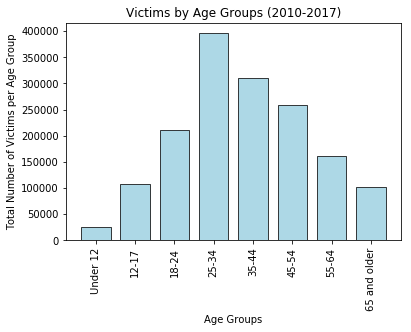

In [161]:
# Add binned groups to data frame
df["Victim Age Groups"] = pd.cut(df["VictimAge"], bins, labels=bin_names)

# Graph the value counts of the binned group vs the binned names
plt.bar(height=df["Victim Age Groups"].value_counts().sort_index(), x=bin_names, width=0.75,
        align="center", color="lightblue", edgecolor="black", linewidth=0.75)

# Add labels to the graph
plt.title("Victims by Age Groups (2010-2017)")
plt.xlabel("Age Groups")
plt.ylabel("Total Number of Victims per Age Group")
plt.xticks(rotation="vertical")
plt.savefig("age_group_totals.png", bbox_inches="tight")

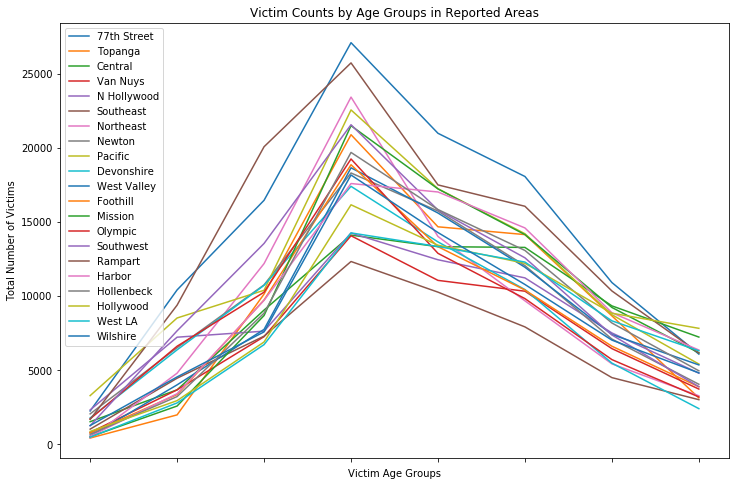

In [211]:
fig, ax = plt.subplots(figsize=(12,8))

df.groupby(["Victim Age Groups", "AreaName"]).count()["VictimAge"].unstack().plot(ax=ax)
plt.title("Victim Counts by Age Groups in Reported Areas")
plt.ylabel("Total Number of Victims")
plt.legend(df["AreaName"].unique())
plt.savefig("age_group_by_areas.png", bbox_inches="tight")

M    784709
F    776794
X     13860
H        63
N        16
-         1
Name: VictimSex, dtype: int64


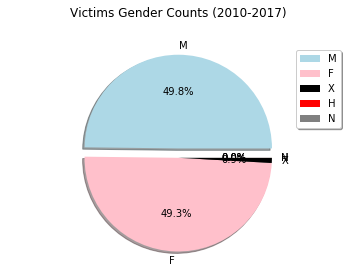

In [220]:
gender_analysis = df["VictimSex"].value_counts()
colors = ["lightblue", "pink", "black", "red", "gray", "white"]
plt.pie(gender_analysis, autopct='%1.1f%%', shadow=True, colors=colors,
        labels = ["M", "F", "X", "H", "N", "-"], explode=[0.1, 0, 0, 0, 0, 0])
plt.title("Victims Gender Counts (2010-2017)", position=(0.5, 1.1))
plt.axis("equal")
plt.legend(["M", "F", "X", "H", "N"], shadow=True)
plt.savefig("gender_totals.png", bbox_inches="tight")

print(gender_analysis)

Here are the victim counts by gender for 77th Street: 
F    62943
M    48061
X     1256
N        2
H        1
Name: VictimSex, dtype: int64


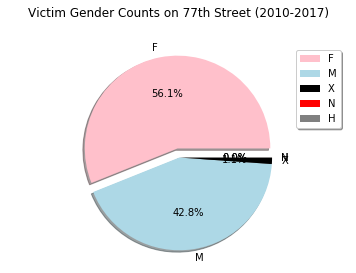

In [202]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
print(f"Here are the victim counts by gender for 77th Street: ")
print(loc_77["VictimSex"].value_counts())

plt.pie(loc_77["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "N", "H"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts on 77th Street (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_count_77th.png", bbox_inches="tight")

Here are the victim counts by gender for Hollenbeck: 
F    26943
M    23828
X       65
H        2
Name: VictimSex, dtype: int64


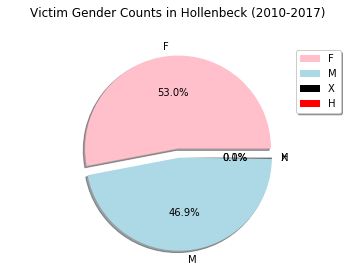

In [203]:
loc_hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
print(f"Here are the victim counts by gender for Hollenbeck: ")
print(loc_hollenbeck["VictimSex"].value_counts())

plt.pie(loc_hollenbeck["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H"], explode=[0.1, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts in Hollenbeck (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_count_hollenbeck.png", bbox_inches="tight")

Here are the victim counts by Hispanic descent: 
F    318409
M    302691
H        27
X        13
N         6
Name: VictimSex, dtype: int64


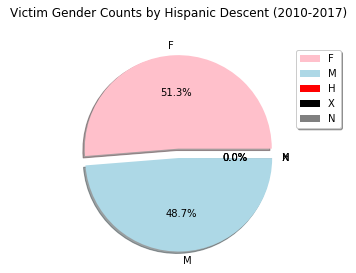

In [204]:
h_descent=df.loc[df["VictimDescent"] == "H"]
print(f"Here are the victim counts by Hispanic descent: ")
print(h_descent["VictimSex"].value_counts())

plt.pie(h_descent["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "red", "black", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "H", "X", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by Hispanic Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_hispanic.png", bbox_inches="tight")

Here are the victim counts by White descent: 
M    228422
F    196711
H        11
X         8
N         4
Name: VictimSex, dtype: int64


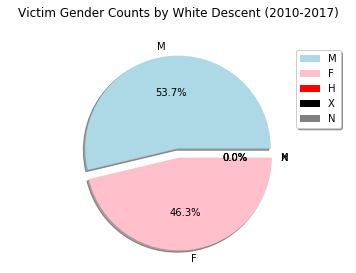

In [205]:
w_descent=df.loc[df["VictimDescent"] == "W"]
print(f"Here are the victim counts by White descent: ")
print(w_descent["VictimSex"].value_counts())

plt.pie(w_descent["VictimSex"].value_counts(), shadow=True, colors=["lightblue", "pink", "red", "black", "gray"], autopct='%1.1f%%',
        labels = ["M", "F", "H", "X", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by White Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_white.png", bbox_inches="tight")

Here are the victim counts by Black descent: 
F    170626
M    121565
X         7
H         5
N         2
Name: VictimSex, dtype: int64


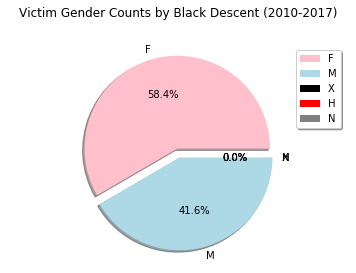

In [206]:
b_descent=df.loc[df["VictimDescent"] == "B"]
print(f"Here are the victim counts by Black descent: ")
print(b_descent["VictimSex"].value_counts())

plt.pie(b_descent["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts by Black Descent (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_descent_black.png", bbox_inches="tight")

Here are the victim gender counts of 18-24 year olds: 
F    119363
M     92339
X        74
H        10
N         1
Name: VictimSex, dtype: int64


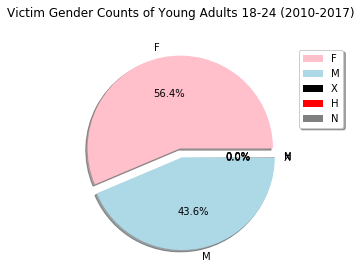

In [215]:
young_adults=df.loc[df["Victim Age Groups"] == "18-24"]
print(f"Here are the victim gender counts of 18-24 year olds: ")
print(young_adults["VictimSex"].value_counts())

plt.pie(young_adults["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts of Young Adults 18-24 (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_young_adults.png", bbox_inches="tight")


Here are the victim gender counts of 25-34 year olds: 
F    207645
M    187996
X       129
H        16
N         3
Name: VictimSex, dtype: int64


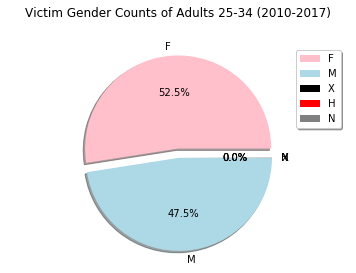

In [216]:
ages_25_34 = df.loc[df["Victim Age Groups"] == "25-34"]
print(f"Here are the victim gender counts of 25-34 year olds: ")
print(ages_25_34["VictimSex"].value_counts())
plt.pie(ages_25_34["VictimSex"].value_counts(), shadow=True, colors=["pink", "lightblue", "black", "red", "gray"], autopct='%1.1f%%',
        labels = ["F", "M", "X", "H", "N"], explode=[0.1, 0, 0, 0, 0])
plt.legend(shadow=True)
plt.axis("equal")
plt.title("Victim Gender Counts of Adults 25-34 (2010-2017)", position=(0.5, 1.1))
plt.savefig("gender_adults_25_34.png", bbox_inches="tight")
